import dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [43]:
#loading the data from csv to pandas data frame
insurance_dataset=pd.read_csv('/content/insurance.csv')

In [44]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
insurance_dataset.shape

(1338, 7)

In [46]:
# getting some inforamation about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features  
.sex    
.smoker   
.Region    


In [47]:
 # stastical measure
 insurance_dataset.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-329194703.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


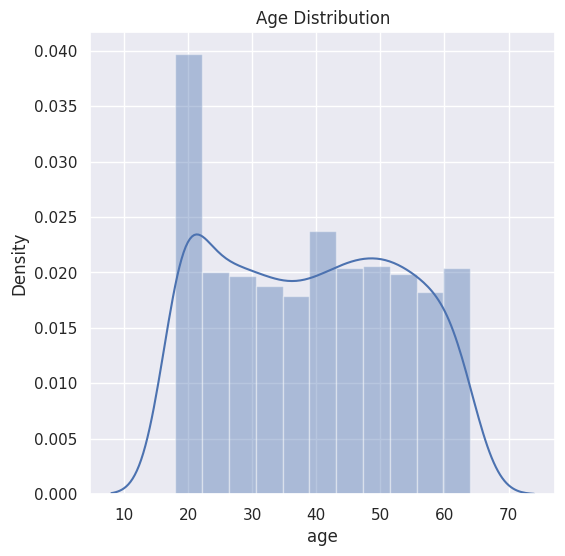

In [48]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()


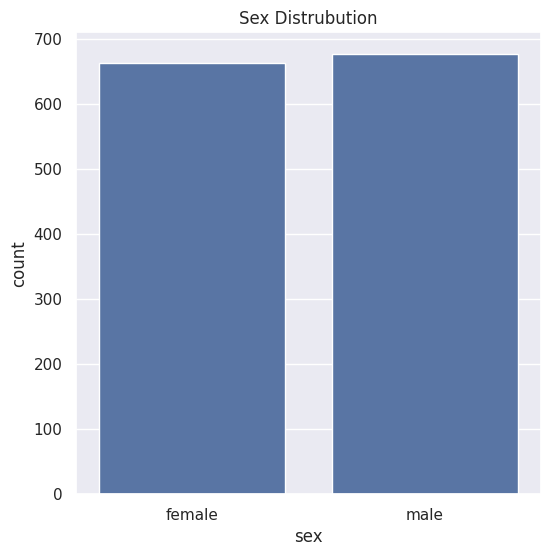

In [49]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distrubution')
plt.show()


/tmp/ipython-input-2058253436.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


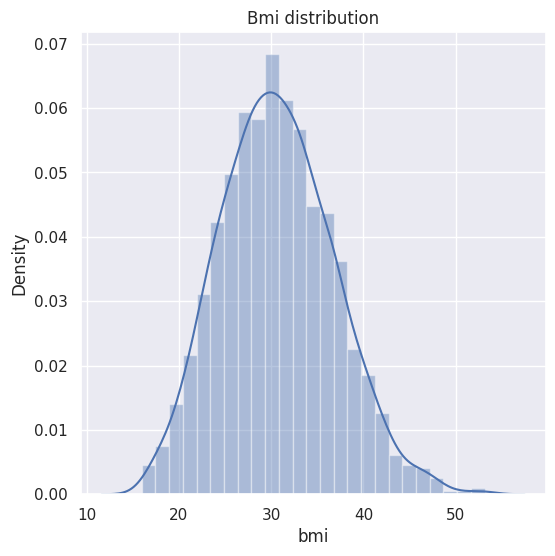

In [50]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Bmi distribution')
plt.show()

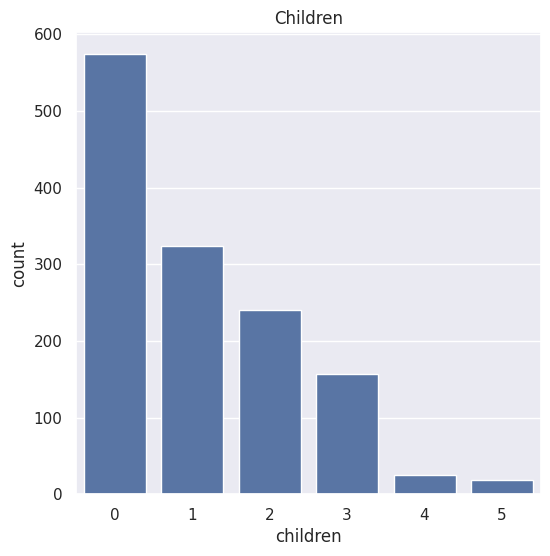

In [51]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()


In [52]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


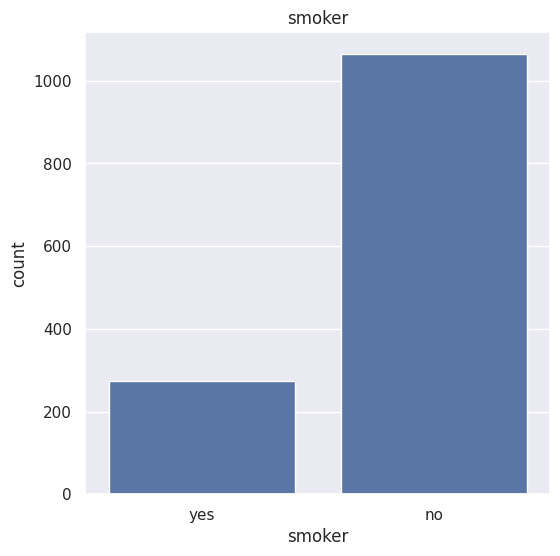

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()


In [54]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


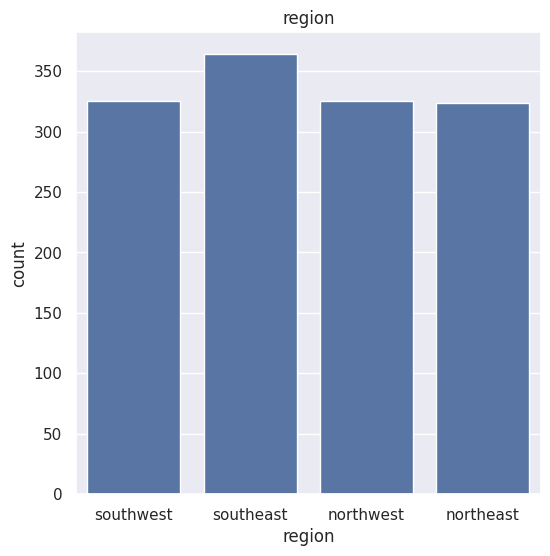

In [55]:
# region distrubution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()


In [56]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-4192357571.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


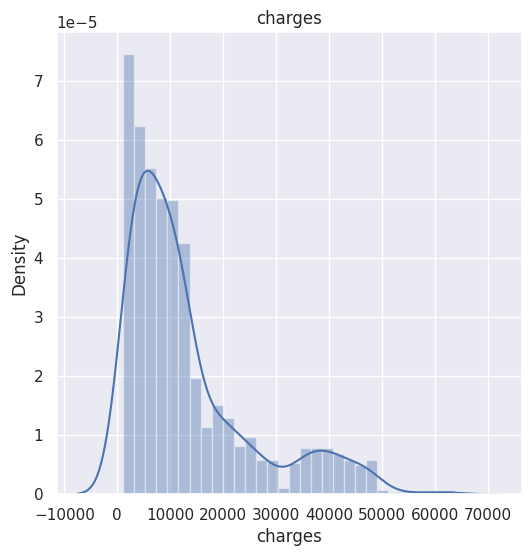

In [57]:
# charges distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges')
plt.show()

Encoding the categorical columns  


In [58]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)



/tmp/ipython-input-520867898.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-520867898.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-520867898.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

In [59]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


splitting the features and target

In [60]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [61]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [62]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting training and test data

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [67]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training  
here we are using Linear Regression  

In [68]:
# loading the model
model=LinearRegression()

In [69]:
# training model on training data
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [70]:
# predicting on training data
training_data_prediction=model.predict(X_train)

In [71]:
# R squared value

r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)


R squared value: 0.751505643411174


In [72]:
# predicting on test data
test_data_prediction=model.predict(X_test)

In [73]:
# R squared value

r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value:',r2_test)


R squared value: 0.7447273869684076


Building predictive system

In [76]:
# make predictive system for user
print("💡 Medical Insurance Cost Prediction System 💡\n")

# User input (text-based)
age = int(input("🎂 Enter Age: "))
sex = input("👩‍🦰👨 Enter Sex (male/female): ")
bmi = float(input("⚖️ Enter BMI: "))
children = int(input("👶 Enter number of children: "))
smoker = input("🚬 Smoker? (yes/no): ")
region = input("🌍 Region (southeast/southwest/northeast/northwest): ")

# Encoding categorical data
if sex.lower() == "male":
    sex = 0
else:
    sex = 1

if smoker.lower() == "yes":
    smoker = 0
else:
    smoker = 1

region_mapping = {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}
region = region_mapping[region.lower()]

# Prepare input array
input_data = np.array([[age, sex, bmi, children, smoker, region]])

# Predict
prediction = model.predict(input_data)

print("\n🔮 Prediction Result 🔮")
print(f"💰 Estimated Medical Insurance Cost: **${prediction[0]:.2f}** 🏥")


💡 Medical Insurance Cost Prediction System 💡

🎂 Enter Age: 31
👩‍🦰👨 Enter Sex (male/female): female
⚖️ Enter BMI: 25.5
👶 Enter number of children: 0
🚬 Smoker? (yes/no): no
🌍 Region (southeast/southwest/northeast/northwest): southeast

🔮 Prediction Result 🔮
💰 Estimated Medical Insurance Cost: **$3680.73** 🏥


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
